In [27]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [6]:
file = '../data/alkon-hinnasto-tekstitiedostona.csv'

In [11]:
df = pd.read_csv(file, skiprows=2)

In [20]:
display(df.shape)
display(df.Tyyppi.unique())

(11247, 30)

array(['punaviinit', 'roseeviinit', 'valkoviinit', nan, 'rommit',
       'konjakit', 'viskit', 'oluet', 'siiderit', 'juomasekoitukset',
       'alkoholittomat', 'lahja- ja juomatarvikkeet',
       'Jälkiruokaviinit, väkevöidyt ja muut viinit',
       'Brandyt, Armanjakit ja Calvadosit', 'Ginit ja maustetut viinat',
       'Liköörit ja Katkerot', 'kuohuviinit & samppanjat',
       'vodkat ja viinat'], dtype=object)

In [23]:
df = df[df['Tyyppi'] == 'oluet']
display(df.shape)

(1156, 30)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 6264 to 8234
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Numero                  1156 non-null   int64  
 1   Nimi                    1156 non-null   object 
 2   Valmistaja              1156 non-null   object 
 3   Pullokoko               1156 non-null   object 
 4   Hinta                   1156 non-null   float64
 5   Litrahinta              1156 non-null   float64
 6   Uutuus                  77 non-null     object 
 7   Hinnastojärjestyskoodi  1156 non-null   object 
 8   Tyyppi                  1156 non-null   object 
 9   Alatyyppi               829 non-null    object 
 10  Erityisryhmä            227 non-null    object 
 11  Oluttyyppi              1156 non-null   object 
 12  Valmistusmaa            1156 non-null   object 
 13  Alue                    0 non-null      object 
 14  Vuosikerta              17 non-null  

In [35]:
df.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Suljentatyyppi,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,metallinen kierrekapseli,12.5,NaN,NaN,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,kruunukorkki,9.5,NaN,NaN,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355


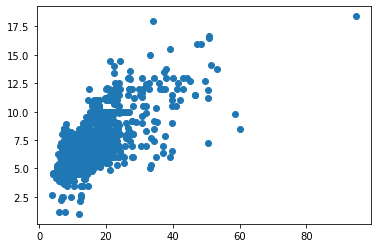

In [41]:
plt.scatter(df['Litrahinta'], df['Alkoholi-%'])
plt.show()

,count_of_products,mean_price,meand_litre_price,mean_alcohol_percentage
Alatyyppi,,,,
Erikoisuus,254,8.263465,18.956890,7.092520
Stout & Porter,186,8.570860,22.360806,9.469355
Lager,120,6.947500,7.756000,5.157500
Ale,106,7.805660,16.149906,7.603774
Vehnäolut,62,4.203226,9.673871,5.850000
Vahva lager,45,4.986000,8.822222,7.322222
Pils,31,4.679032,8.973871,5.038710
Tumma lager,23,3.786522,8.395217,4.978261
Rosee ja muut viinit,2,37.020000,17.900000,7.150000


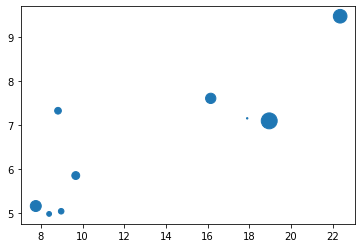

In [75]:
df_alatyypit = df.groupby(['Alatyyppi']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    meand_litre_price = ('Litrahinta', 'mean'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean')
).sort_values(by='count_of_products',ascending=False)
display(df_alatyypit.head(10))
plt.scatter('meand_litre_price', 'mean_alcohol_percentage', s='count_of_products', data=df_alatyypit)
plt.show()

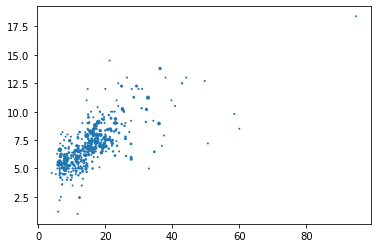

In [76]:
df_valmistaja = df.groupby(['Valmistaja']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    meand_litre_price = ('Litrahinta', 'mean'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean')
).sort_values(by='count_of_products',ascending=False)
df_valmistaja.head(20)
plt.scatter('meand_litre_price', 'mean_alcohol_percentage', s='count_of_products', data=df_valmistaja)
plt.show()

In [77]:
from sklearn.cluster import KMeans

In [94]:
df_price_alcohol = df[['Litrahinta', 'Alkoholi-%']]
df_price_alcohol.head()

,Litrahinta,Alkoholi-%
6264,23.92,12.5
6265,15.18,8.0
6266,16.18,8.0
6267,20.68,9.5
6268,16.42,8.0


In [96]:
kmeans = KMeans(random_state=0).fit(df_price_alcohol)

In [97]:
centroids = kmeans.cluster_centers_

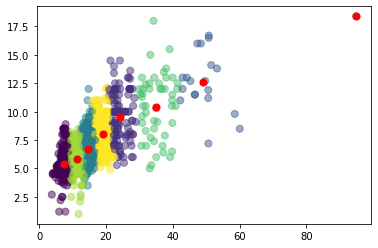

In [98]:
plt.scatter(df_price_alcohol['Litrahinta'], df_price_alcohol['Alkoholi-%'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()